# Librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
import matplotlib.dates as mdates
import datetime
import glob
import os
import warnings
warnings.filterwarnings('ignore')

plt.style.use("default")
mpl.rcParams['xtick.labelsize']=13
mpl.rcParams['ytick.labelsize']=13
mpl.rcParams['font.sans-serif'] = "Century Gothic"
mpl.rcParams['font.family'] = "Century Gothic"
mpl.rcParams['font.weight'] = 'normal'
def fig_params(ax):
    ax.grid()    
    ax.spines['left'].set_color('gray')
    ax.spines['right'].set_color('gray')
    ax.spines['bottom'].set_color('gray')
    ax.spines['top'].set_color('gray')
    ax.tick_params('y', colors='tab:gray')
    ax.tick_params('x', colors='tab:gray')
    for label in ax.get_yticklabels():
        label.set_color('k')
        label.set_size(13)
    for label in ax.get_xticklabels():
        label.set_color('k')
        label.set_size(13)

# Data

In [12]:
def read_data_file_TPAR(frontera, paths, date_ini, date_fin, dispersional_direction):
    """
    Input:
    - frontera: orientación de la frontera/ 'Norte'/'Sur'/'Este'/'Oeste'
    - paths: ruta de los archvivos
    -------------------------------------------------------------------
    Output:
    -  
    """
    custom_date_parser = lambda x: datetime.datetime.strptime(x, "%Y%m%d.%H%M%S")
    dic_ = {}
    for j, path in enumerate(paths):
        if (frontera in path) == True:
            df_data = pd.read_csv(path, sep ='\s+', header=7, usecols=[0,4,6,7], names= ['time', 'Hs', 'Tp', 'Dir'],
                parse_dates=['time'],
                date_parser=custom_date_parser)
            df_data.set_index('time', inplace=True)
            try:
                df_data.loc[df_data['Tp']<=2, 'Tp'] = df_data[df_data['Tp']<=2]['Tp'] +4.5
            except:
                pass

            name_df = path.split('.')[0].split('_')[2]
            dic_.update({name_df: df_data})
            time_split = df_data[date_ini:date_fin].index
            time_tpar = [time_split[i].strftime("%Y%m%d.%H%M") for i in range( len(time_split))]
            dis_direc = np.ones(len(time_split))*dispersional_direction
            df_tpar = pd.DataFrame({'time':time_tpar, 'Hs':df_data[date_ini:date_fin]['Hs'], 
                                   'Tp':df_data[date_ini:date_fin]['Tp'], 'Dir':df_data[date_ini:date_fin]['Dir'], 
                                   'Direc_disp':dis_direc})

            
            with open (name_df+'_nest.bnd', "w") as f:
                f.write("TPAR \n")
                np.savetxt(f,df_tpar,fmt =('%s  %7.9f  %8.9f  %9.9f  %5.1f'))            
        else:
            pass
    return dic_

In [13]:
def fig_tepar(dic, frontera, variable, coef_ticklbs, label_rotation, date_ini, date_fin):
    """
    Input:
    - dic : diccionario de la frontera para dibujar
    - frontera: frontera a dibujar 'Norte'/'Sur'/'Este'/'Oeste'
    - variable: variable a plotear 'Hs'/'Tp'/'Dir'
    - coef_ticklbs: coeficiente para ajustar los labels del tiempo
    - label_rotation: angulo de rotación para el eje del tiempo
    -------------------------------------------------------------------
    Output: 
    - figura de la variable especificada
    """
    
    keys_dic = list(dic.keys())
    fig, ax = plt.subplots(figsize = (10,4))

    colors = mpl.cm.coolwarm(np.linspace(0,1,len(keys_dic)))
    for i, key in enumerate(keys_dic):
        df = dic[key][variable][date_ini:date_fin]
        ax.plot(df, label = key, color = colors[i])
    ax.set_xlabel('Date', size = 14, fontweight = 'bold')
    if variable == 'Hs':
        title =  'Significant wave height at ' + frontera
        units = '[m]'
    elif variable == 'Tp':
        title =  'Peak period at ' + frontera
        units = '[seg]'
    else:
        title = 'Wave direction at ' + frontera
        units = '[deg]'
    ticklabels = df.index[::coef_ticklbs]
    ax.set_ylabel(variable +' '+ units, size = 14, fontweight = 'bold')
    ax.set_title(title,size = 16,fontweight = 'bold')   # Subtítulo de la figura
    ax.set_xticks(ticklabels)
    date_format = mdates.DateFormatter('%y-%m-%d %H')
    ax.xaxis.set_major_formatter(date_format)
    fig_params(ax)
    fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.001),fancybox=True, shadow=True, ncol=4, fontsize = 12)
    plt.xticks(rotation=label_rotation)
    fig.tight_layout()
    plt.subplots_adjust(wspace=0.2)
    plt.subplots_adjust(hspace=0.2)

In [4]:
# Paths global points
paths = glob.glob(r"C:\Users\paula\Desktop\SWAN_TEST59\*.out")
paths = sorted(paths)
date_ini = datetime.datetime(2021,11,1,0) # Parámetro a variar
date_fin = datetime.datetime(2021,11,14,16) # Parámetro a variar

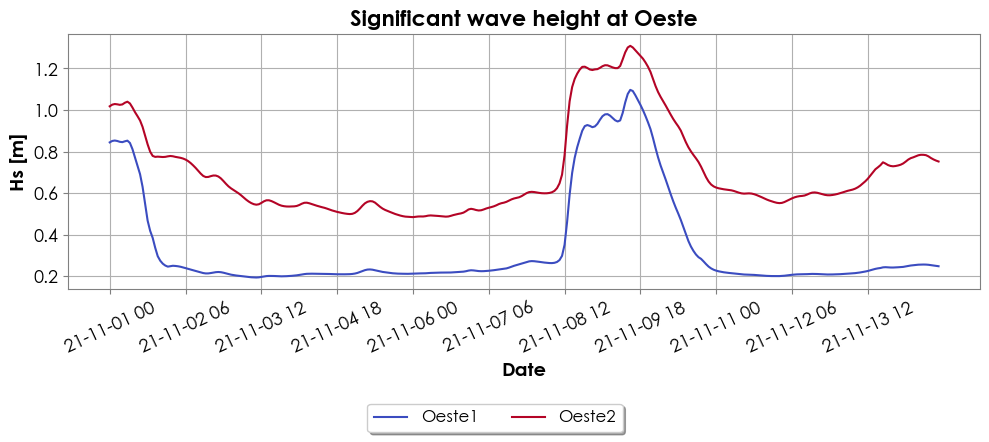

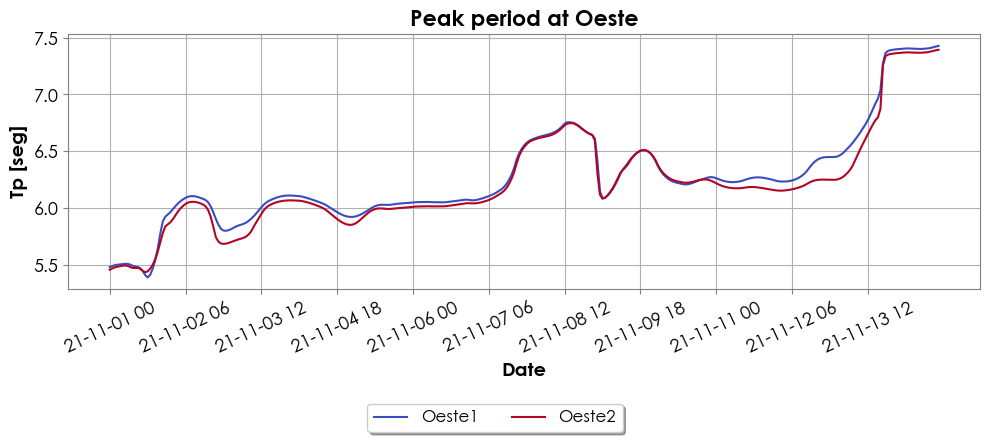

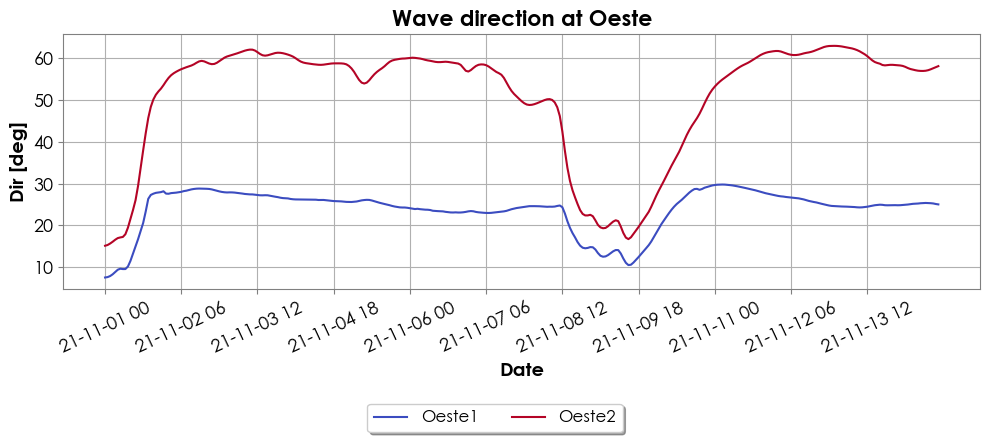

In [14]:
dic_Oeste = read_data_file_TPAR(frontera='Oeste', paths=paths, 
                                date_ini=date_ini, date_fin=date_fin, dispersional_direction= 4)
fig_tepar(dic=dic_Oeste, frontera='Oeste', variable='Hs', coef_ticklbs=30, label_rotation=25, date_ini=date_ini, date_fin=date_fin)
fig_tepar(dic=dic_Oeste, frontera='Oeste', variable='Tp', coef_ticklbs=30, label_rotation=25, date_ini=date_ini, date_fin=date_fin)
fig_tepar(dic=dic_Oeste, frontera='Oeste', variable='Dir', coef_ticklbs=30, label_rotation=25, date_ini=date_ini, date_fin=date_fin)

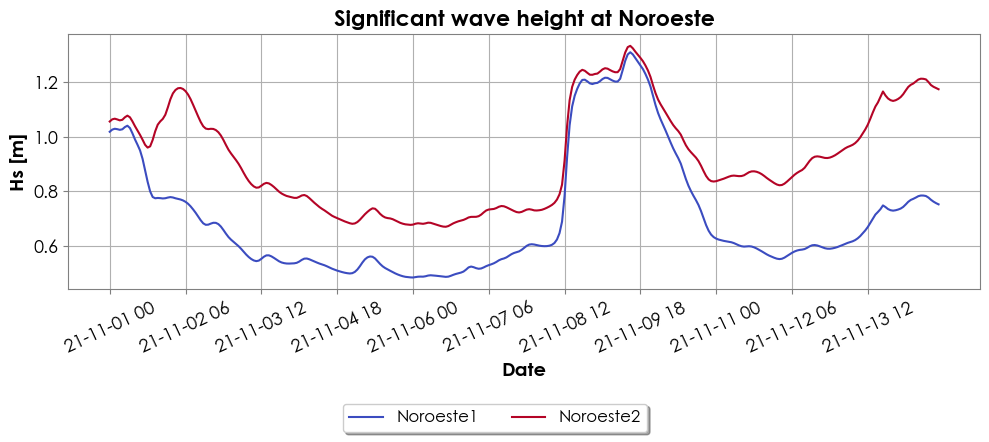

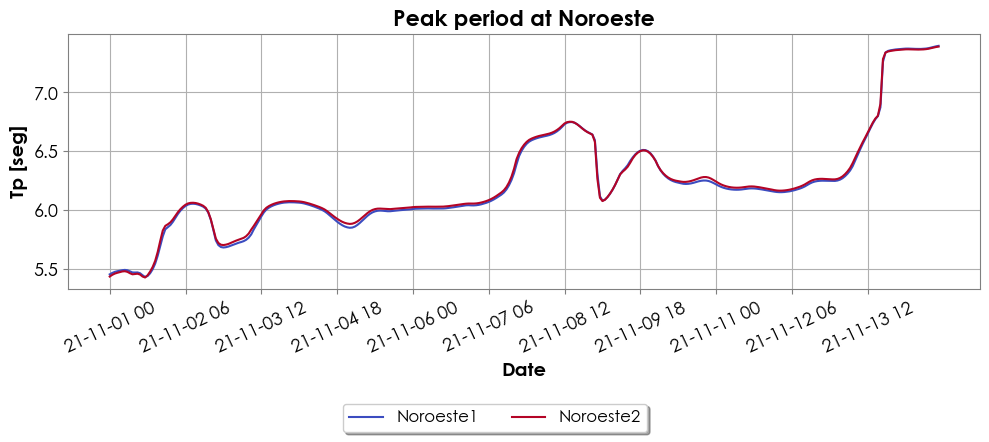

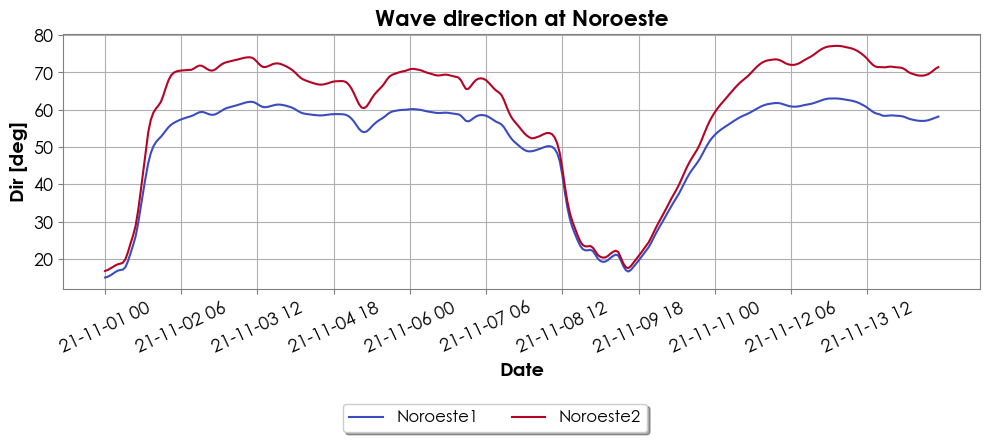

In [17]:
dic_Noroeste = read_data_file_TPAR(frontera='Noroeste', paths=paths, 
                                   date_ini=date_ini, date_fin=date_fin, dispersional_direction= 4)
fig_tepar(dic=dic_Noroeste, frontera='Noroeste', variable='Hs', coef_ticklbs=30, label_rotation=25, date_ini=date_ini, date_fin=date_fin)
fig_tepar(dic=dic_Noroeste, frontera='Noroeste', variable='Tp', coef_ticklbs=30, label_rotation=25, date_ini=date_ini, date_fin=date_fin)
fig_tepar(dic=dic_Noroeste, frontera='Noroeste', variable='Dir', coef_ticklbs=30, label_rotation=25, date_ini=date_ini, date_fin=date_fin)

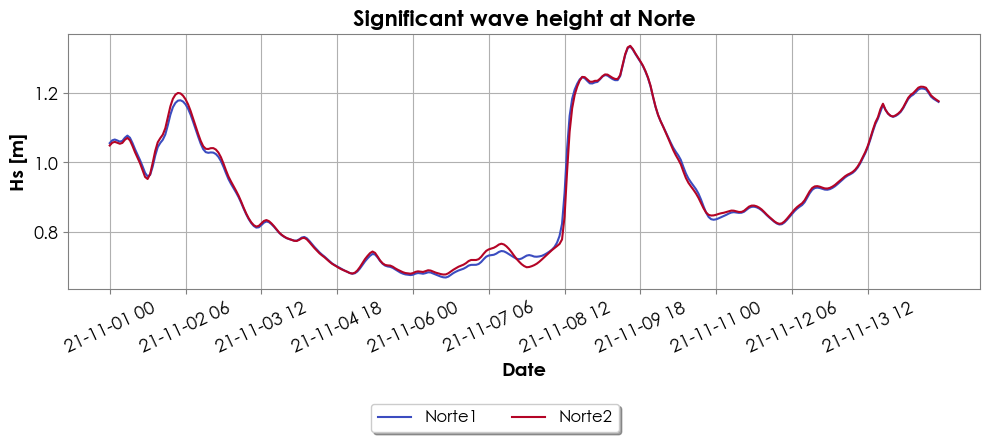

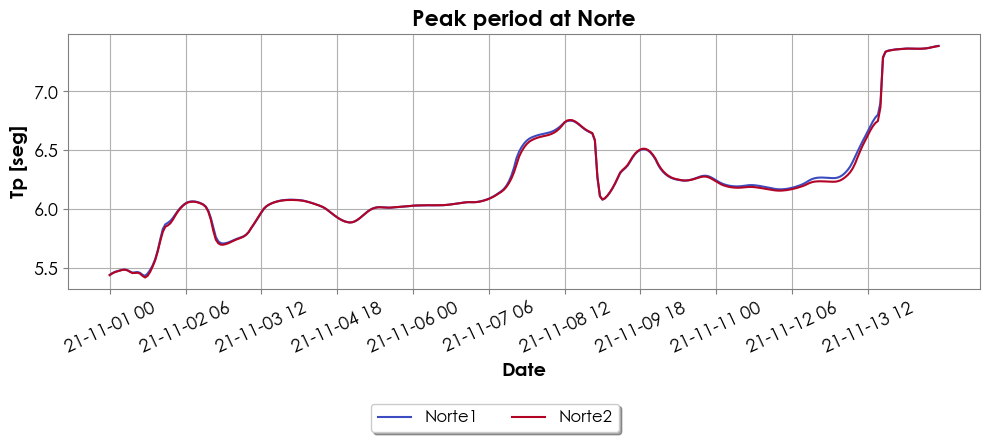

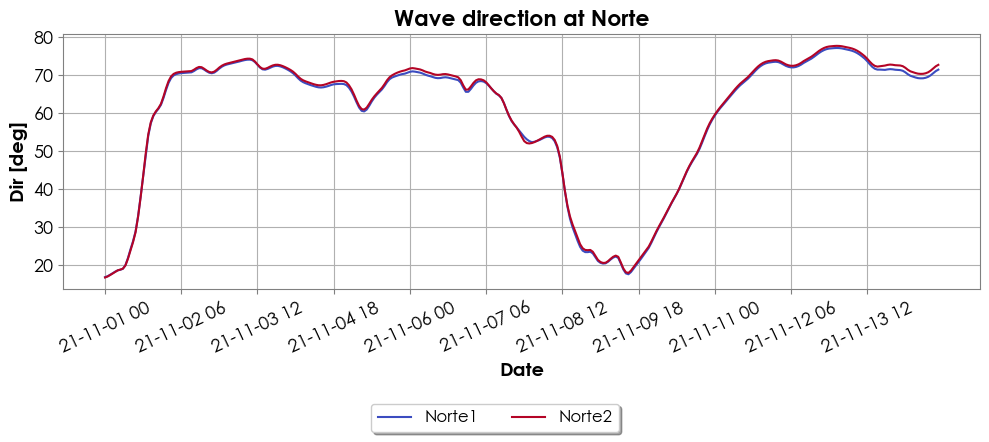

In [18]:
dic_Norte = read_data_file_TPAR(frontera='Norte', paths=paths, 
                                date_ini=date_ini, date_fin=date_fin, dispersional_direction= 4)
fig_tepar(dic=dic_Norte, frontera='Norte', variable='Hs', coef_ticklbs=30, label_rotation=25, date_ini=date_ini, date_fin=date_fin)
fig_tepar(dic=dic_Norte, frontera='Norte', variable='Tp', coef_ticklbs=30, label_rotation=25, date_ini=date_ini, date_fin=date_fin)
fig_tepar(dic=dic_Norte, frontera='Norte', variable='Dir', coef_ticklbs=30, label_rotation=25, date_ini=date_ini, date_fin=date_fin)

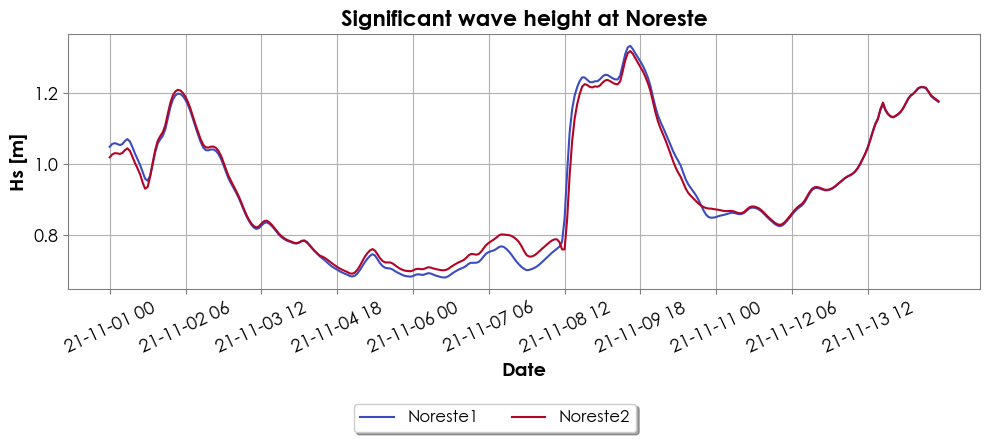

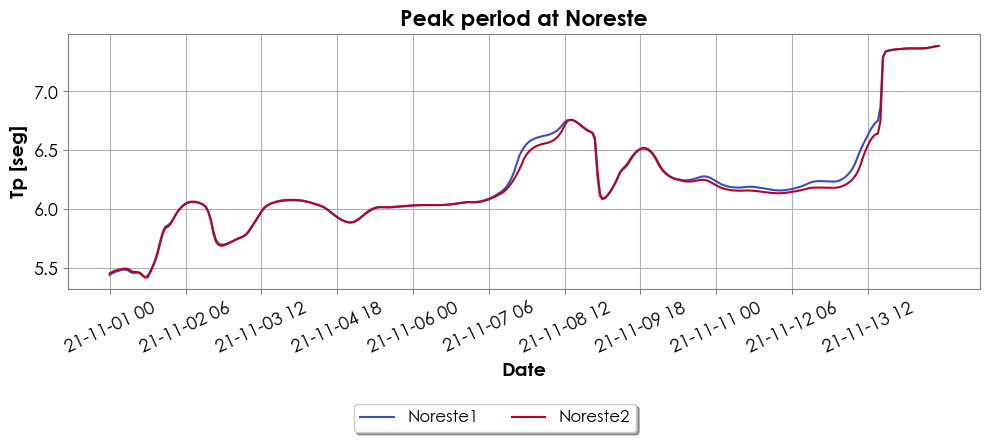

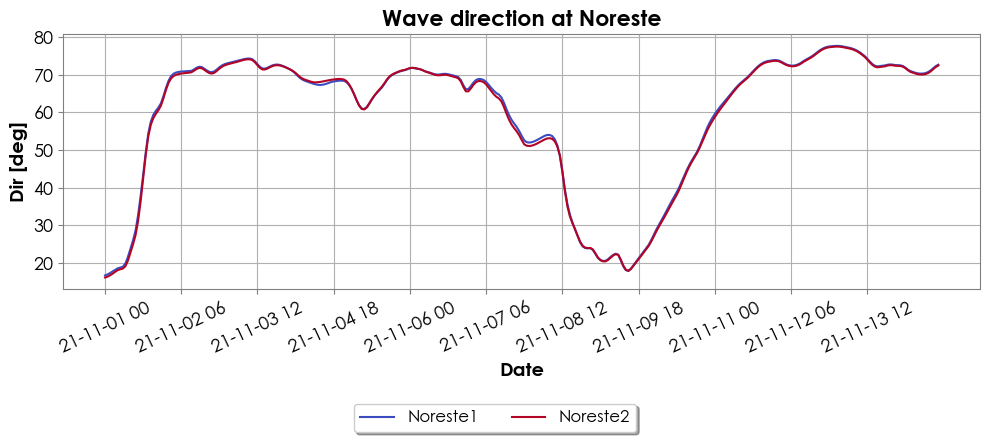

In [19]:
dic_Noreste = read_data_file_TPAR(frontera='Noreste', paths=paths, 
                                  date_ini=date_ini, date_fin=date_fin, dispersional_direction= 4)
# dic_Noreste['Oeste2'].loc[dic_Noreste['Oeste2']['Tp'] <= 2, 'Tp'] = dic_Noreste['Oeste2'][dic_Noreste['Oeste2']['Tp']<=2]['Tp'] +4.5
fig_tepar(dic=dic_Noreste, frontera='Noreste', variable='Hs', coef_ticklbs=30, label_rotation=25, date_ini=date_ini, date_fin=date_fin)
fig_tepar(dic=dic_Noreste, frontera='Noreste', variable='Tp', coef_ticklbs=30, label_rotation=25, date_ini=date_ini, date_fin=date_fin)
fig_tepar(dic=dic_Noreste, frontera='Noreste', variable='Dir', coef_ticklbs=30, label_rotation=25, date_ini=date_ini, date_fin=date_fin)

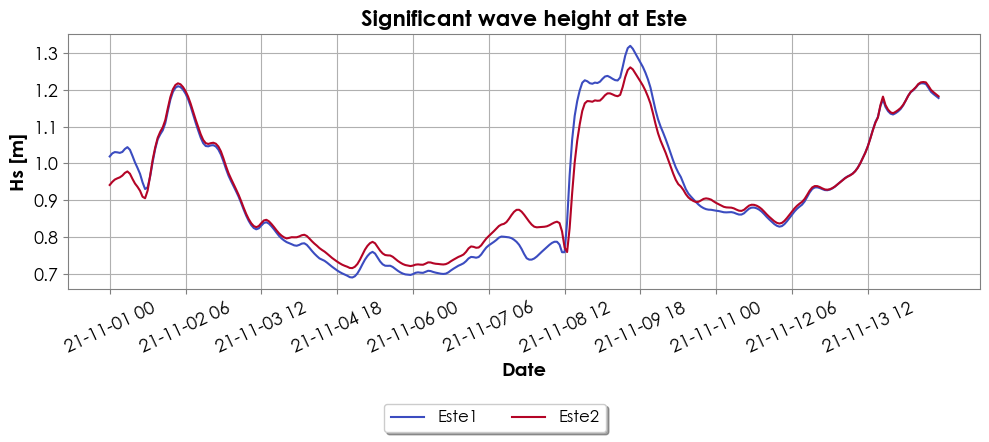

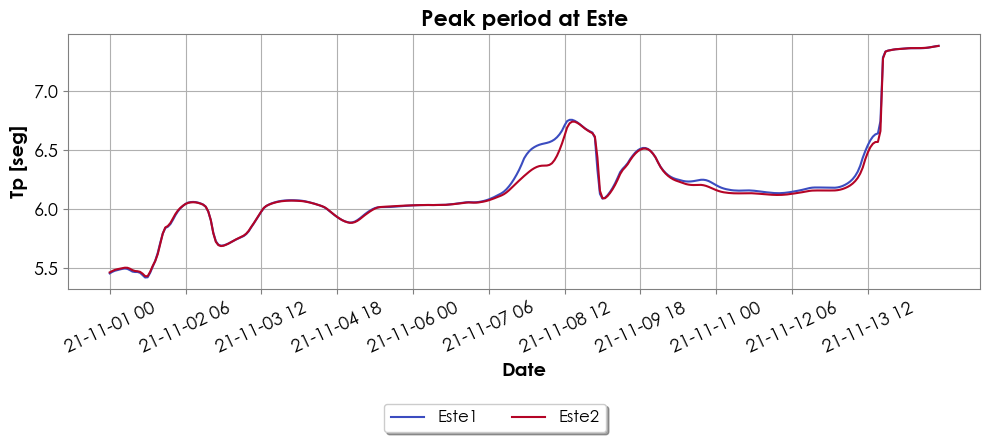

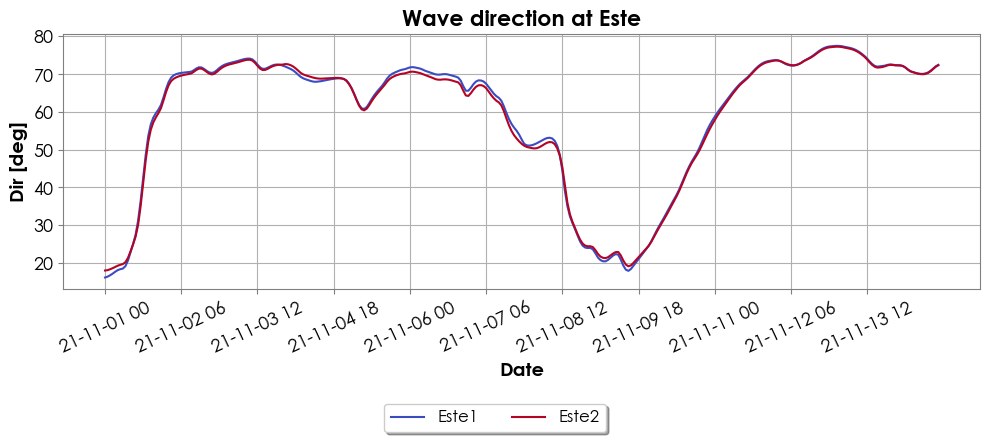

In [20]:
dic_Este = read_data_file_TPAR(frontera='Este', paths=paths, 
                               date_ini=date_ini, date_fin=date_fin, dispersional_direction= 4)
# dic_Este['Oeste2'].loc[dic_Este['Oeste2']['Tp'] <= 2, 'Tp'] = dic_Este['Oeste2'][dic_Este['Oeste2']['Tp']<=2]['Tp'] +4.5
fig_tepar(dic=dic_Este, frontera='Este', variable='Hs', coef_ticklbs=30, label_rotation=25, date_ini=date_ini, date_fin=date_fin)
fig_tepar(dic=dic_Este, frontera='Este', variable='Tp', coef_ticklbs=30, label_rotation=25, date_ini=date_ini, date_fin=date_fin)
fig_tepar(dic=dic_Este, frontera='Este', variable='Dir', coef_ticklbs=30, label_rotation=25, date_ini=date_ini, date_fin=date_fin)

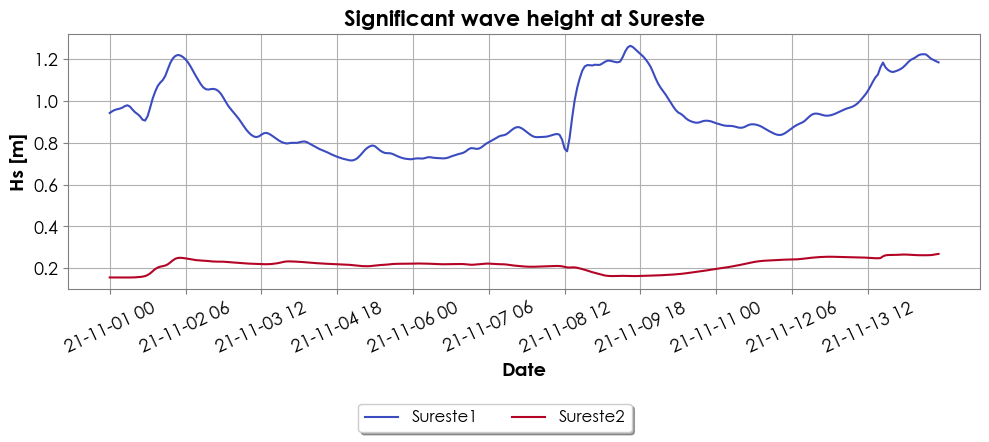

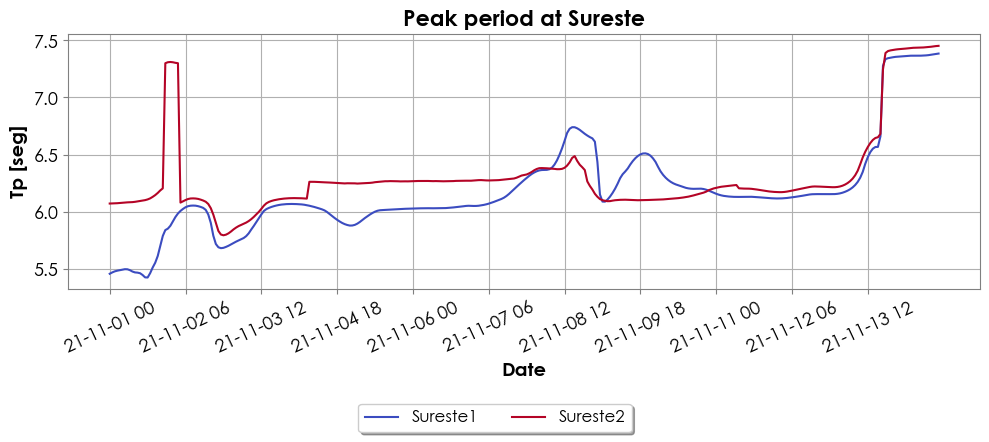

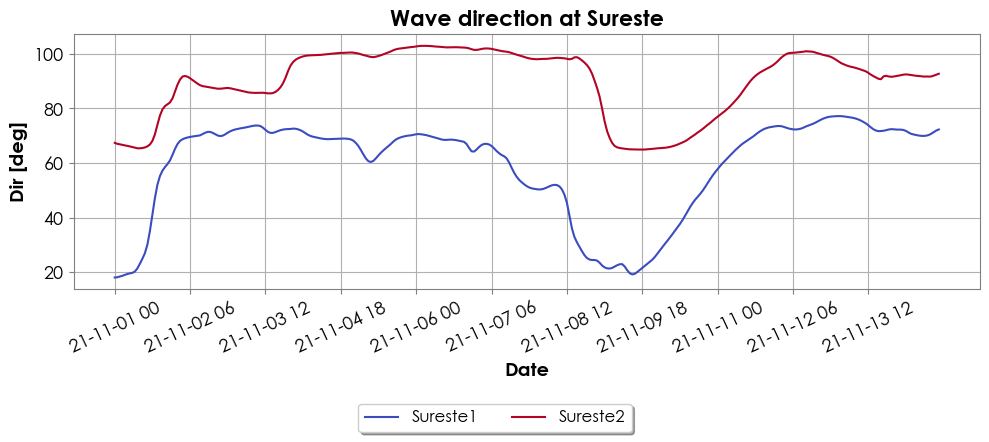

In [21]:
dic_Sureste = read_data_file_TPAR(frontera='Sureste', paths=paths, 
                                  date_ini=date_ini, date_fin=date_fin, dispersional_direction= 4)
# dic_Sureste['Oeste2'].loc[dic_Sureste['Oeste2']['Tp'] <= 2, 'Tp'] = dic_Sureste['Oeste2'][dic_Sureste['Oeste2']['Tp']<=2]['Tp'] +4.5
fig_tepar(dic=dic_Sureste, frontera='Sureste', variable='Hs', coef_ticklbs=30, label_rotation=25, date_ini=date_ini, date_fin=date_fin)
fig_tepar(dic=dic_Sureste, frontera='Sureste', variable='Tp', coef_ticklbs=30, label_rotation=25, date_ini=date_ini, date_fin=date_fin)
fig_tepar(dic=dic_Sureste, frontera='Sureste', variable='Dir', coef_ticklbs=30, label_rotation=25, date_ini=date_ini, date_fin=date_fin)

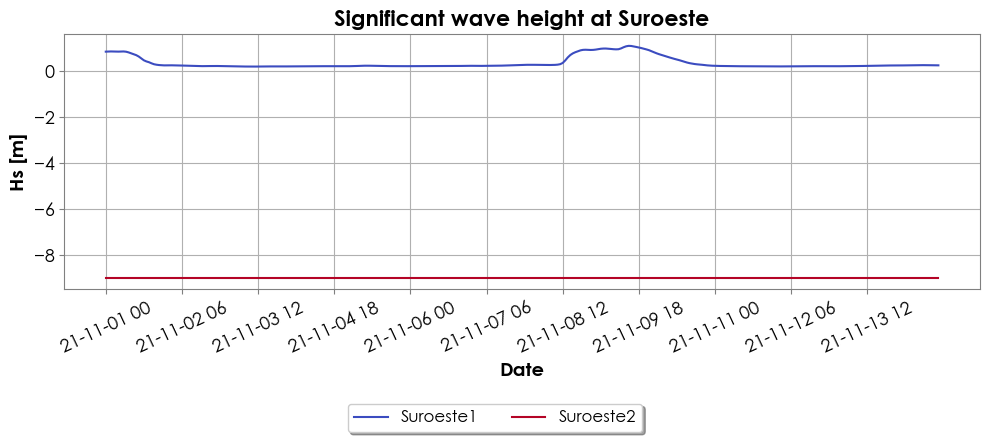

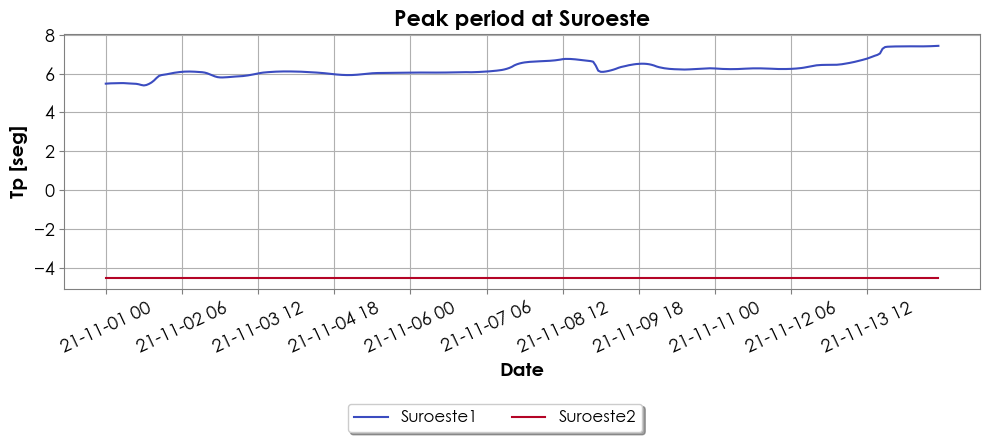

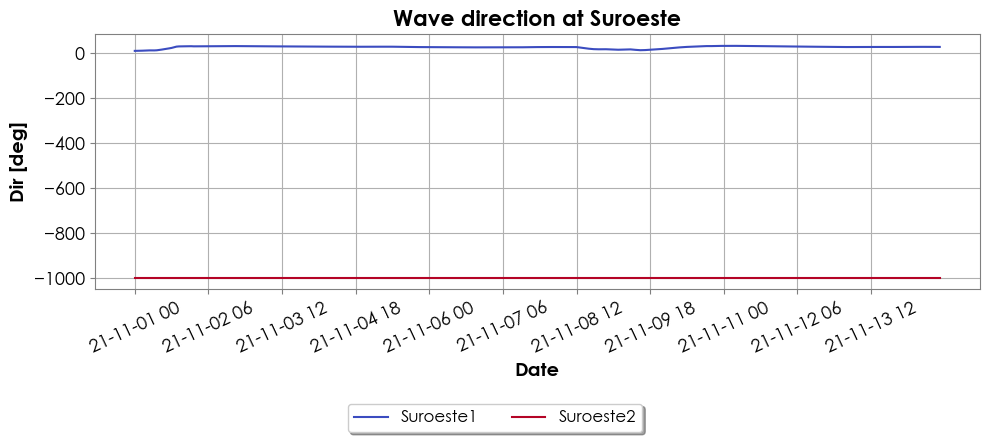

In [22]:
dic_Suroeste = read_data_file_TPAR(frontera='Suroeste', paths=paths, 
                                   date_ini=date_ini, date_fin=date_fin, dispersional_direction= 4)
# dic_Oeste['Oeste2'].loc[dic_Oeste['Oeste2']['Tp'] <= 2, 'Tp'] = dic_Oeste['Oeste2'][dic_Oeste['Oeste2']['Tp']<=2]['Tp'] +4.5
fig_tepar(dic=dic_Suroeste, frontera='Suroeste', variable='Hs', coef_ticklbs=30, label_rotation=25, date_ini=date_ini, date_fin=date_fin)
fig_tepar(dic=dic_Suroeste, frontera='Suroeste', variable='Tp', coef_ticklbs=30, label_rotation=25, date_ini=date_ini, date_fin=date_fin)
fig_tepar(dic=dic_Suroeste, frontera='Suroeste', variable='Dir', coef_ticklbs=30, label_rotation=25, date_ini=date_ini, date_fin=date_fin)